# Week 4 Discussion: MLE and method of moments

*Originally by Jongbin Jung, Camelia Simoiu, Jerry Lin.*
*Minor edits from Alex Chohlas-Wood*

![that-moment-when](img/that_moment_when.jpg)\
*(cue bad "moment" pun groans)*

In [1]:
set.seed(125)
knitr::opts_chunk$set(echo = TRUE)
options(repr.plot.width=4, repr.plot.height=3)
library("dplyr")
library('ggplot2')
theme_set(theme_bw())
comma <- function(n) {
  format(n, big.mark = ",")
}
theta <- 20
n <- 5
example_times <- round(runif(n, 0, theta));


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Introduction

### Let's imagine...

... during a long vacation to some foreign country, you’ve been taking the same bus every morning. 

![that-moment-when](img/bus.jpg)\

Since you’re on vacation, the “morning” has been starting at pretty random times for you, but you’ve been told that the buses in this country try to arrive in constant intervals throughout the whole day.

During your stay so far, the times you’ve waited for a bus (in minutes) have been:

    16,2,6,7,19

We wish to know the constant interval at which buses are supposed to arrive.

### A model

Let’s call this interval $\theta$.

One way to model the historically observed wait times, $X_1,X_2,\cdots,X_5$, is to treat them as independent and identially distributed draws from a Uniform(0, $\theta$) distribution. This does require, however, that you’re willing to make at least two assumptions:

1. your arrival time at bus stops in the mornings has been pretty random 
1. the bus you take does indeed arrive every $\theta$ minutes.

While not everyone might be on board with these assumptions, let’s just agree to take them as given, for the purpose of illustration.$^1$

Similar to [last week’s example](https://mybinder.org/v2/gh/stanford-policylab/mse125/HEAD?filepath=week_2%2Festimators-answers.ipynb), there are a few natural and intuitive estimators for $\theta$, given the observed data. But this week, we want to take a more principled approach in finding estimators, so that we have a few ways to construct estimators in situations where obvious/intuitive ones aren’t available. The two methods we look at are [**method of moments**](#Method-of-moments-estimator) and [**maximum likelihood estimators**](#Maximum-likelihood-estimator).

## Method of moments estimator

If we assume that our observed wait times $X_i$ follow a Uniform(0, $\theta$) distribution, then we know from the properties of a Uniform distribution, that the first moment of $X_i$ given the fixed parameter $\theta$, i.e, 

$$ a_1(\theta) = \mathbb{E}_\theta(X_i)=  \frac{\theta}{2}.$$ 

But remember, this is a theoretical value, and not something we can compute from the observed data. With the data, we can estimate the $j$-th moment of $X_i$ via:

$$ \hat{a}_j = \frac{1}{n}\sum_{i=1}^n(X_i)^j$$

or for the first moment, simply the sample mean:

$$\hat{a}_1 = \bar{X}_n = \frac{1}{n} \sum_{i=1}^n(X_i).$$

Given both the theoretical and estimated moments, one way to estimate the parameter $\theta$
would be to set it such that our estimated moment is exactly the theoretical moment$^2$. In other words, we wish to set our estimator $\tilde{\theta}$ such that:

$$
\begin{align}
a_1(\tilde{\theta}) &= \hat{a}_1 \\
\frac{\tilde{\theta}}{2} &= \bar{X}_n \\ 
\tilde{\theta} &= 2 \cdot \bar{X}_n.
\end{align}
$$

In the case of our example, we would compute:

$$2 \cdot \bigg( \frac{16+2+6+7+19}{5} \bigg) = 20.$$

## Maximum likelihood estimator

Another way to construct an estimator is to start from the joint distribution of the observed data, $f(x_1,x_2,\cdots,x_n;\theta)$. In the case of $X_i ∼ \textrm{Uniform}(0,\theta)$, we have

$$
f(x_i;\theta) = 
\begin{cases}
\frac{1}{\theta} & \text{if}~x_i \le \theta \\
0 & \text{otherwise}
\end{cases}
$$

and, since $X_i$ are all independent, 

$$
f(x_1,x_2,\cdots,x_n;\theta) = 
\begin{cases}
(\frac{1}{\theta})^n & \text{if}~x_i \le \theta~\forall_i \\
0 & \text{otherwise}
\end{cases}
$$

Recall that in this joint density, the parameter $\theta$ is fixed, and $f$ is a function of the observable data $X_1,\cdots,X_n.$ 
But in reality, we’ve observed draws of each $X_i$, and would like to know how likely our observed data would have been under different values of $\theta$. 
We can represent this likelihood by thinking of the joint density of the data given $θ$ as a function of $θ$, where the data $X_i$ are now fixed to the values we’ve observed:

$$
\mathcal{L}_n(\theta) =
\begin{cases}
(\frac{1}{\theta})^n & \text{if}~x_i \le \theta~\forall_i \\
0 & \text{otherwise}
\end{cases}
$$

Then, one estimate of $\theta$ might be to find the value of $\theta$ that makes this likelihood as big as possible, a.k.a., the **maximum likelihood estimator**.

One common technique for finding the value of a parameter that maximizes the likelihood function is to take the log of the likelihood, often referred to as the log-likelihood. In this case, that would be:

$$
\ell_n(\theta) = \log\mathcal{L}_n(\theta) =
\begin{cases}
  -n\log(\theta) & \text{if}~x_i \le \theta~\forall_i \\
  -\infty & \mathrm{otherwise}
\end{cases}
$$

To find the value of $\theta$ that maximizes $\ell(\theta)$, we make two observations:

1. $\theta$ cannot be smaller than any of the observed values$^3$, otherwise $\ell(\theta)$ would be $-\infty$!
1. $-n\log(\theta)$ is a [monotonically decreasing function](https://en.wikipedia.org/wiki/Monotonic_function) of $\theta$; 
which means we want to have the smallest possible value of $\theta$, in order to maximize the value of $\ell(\theta)$.

Given these observations, the natural value $\hat{\theta}$ that maximizes
$\ell(\theta)$ can be found to be $\max(X_1, X_2, \cdots, X_n)$,
or in our case, $\hat{\theta} = \max(16,2,6,7,19) = 19$.

We can also use `R` to visualize the log-likelihood
function $\ell(\theta)$ (and its maximum)
as a function of $\theta$, given our observed data.
First, we implement $\ell(\theta)$ as a function in `R`:$^4$

In [2]:
loglikelihood <- function(theta, X) {
  n <- length(X)
  cond <- max(X) <= theta
  ifelse(cond, 1 / theta, -Inf)
}

Then, for the purpose of plotting, we create a data frame with a range of possible values for $\theta$ and the corresponding likelihood:

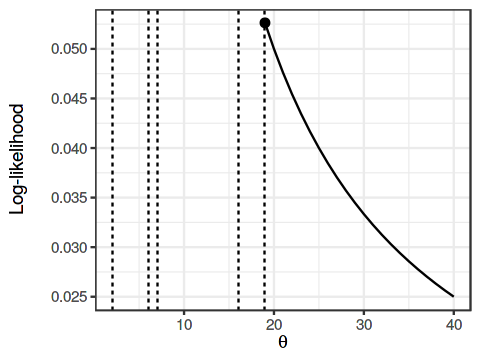

In [3]:
likelihood_df <- tibble(theta = 10:40) %>%
  mutate(l = loglikelihood(theta, X = example_times)) %>%
  filter(l != -Inf)
ggplot(likelihood_df, aes(x = theta, y = l)) +
  geom_vline(xintercept = example_times, linetype = "dashed") +
  geom_line() +
  geom_point(data = function(d) top_n(d, 1, l), size = 2) +
  scale_x_continuous(expression(theta)) +
  scale_y_continuous("Log-likelihood\n")

If the two estimators we find look familiar, that's because they are the estimates we present in [assignment #2](https://5harad.com/mse125/#hw2).

![we-made-it](img/we_made_it.jpg)

## Exercise 

Now that we've seen how to find both MLE and method of moments estimators,
let's practice with a different distribution.

A sample of 3 independent observations ($X_1 = 0.4$, $X_2 = 0.7$, $X_3 = 0.9$)
is collected from a continuous distribution with density function:

$$
f(x;\theta) = \theta x^{\theta−1}, \text{where } 0 < x < 1.
$$
We would like to estimate the unknown parameter $\theta$.

Let's use the two methods we've covered above to find estimators of $\theta$.

### Method of moments estimator 
#### Overview

Recall that the method of moments involves:

1. Analytically finding the theoretical moments of the data
1. Computing the observed moments of the data
1. Setting the estimator such that the observed moments are equal to the 
   theoretical moments
   
Finding estimators for $j$ unknown parameters would require $j$ equations, and 
hence we would need to find up to the $j^{\mathrm{th}}$ moment.
For this exercise, since we have just one unknown parameter $\theta$, 
we only need to find one equation involving the first moment.

#### Theoretical moment

Let's start by deriving the first theoretical moment $m_1(\theta)$ (the mean)! Express $m_1(\theta)$ in terms of $\theta$.\
*Your solution here! HINT: A reminder that for this continuous distribution,* $\mathbb{E}_\theta[X_i] = \int_0^{1} x f(x) dx$.

<!-- START solution -->
\begin{align}
  m_1(\theta) = \mathbb{E}_\theta[X_i] &= \int_0^{1} x f(x) dx  \\
    &= \int_0^{1} \theta x^{\theta} dx  \\
    &= \frac{\theta x^{\theta + 1}}{\theta + 1} \Bigr|_0^1   \\
    &= \frac{\theta}{\theta + 1}.
\end{align}
<!-- END solution -->

#### Observed moment

Now, use the plugin estimator for the first sample moment $\hat{m}_1$:\
*Your solution here!*

<!-- START solution -->
\begin{align}
  \hat{m}_1 
    & = \bar{X}_n \\
    & = \frac{1}{n}\sum_{i=1}^nX_i.
\end{align}
<!-- END solution -->

#### Estimator

Finally, we find our estimator, let's call it $\tilde{\theta}$, to be the 
value of $\theta$ such that the observed moment is equal to the analytical
moment:

$$
m_1(\tilde{\theta}) = \hat{m}_1
$$

Plug in what you found above and solve for $\tilde{\theta}$ to get your estimator:\
*Your solution here!*

<!-- START solution -->
\begin{align}
  \frac{\tilde{\theta}}{\tilde{\theta}+1} &= \hat{m}_1\\
  \tilde{\theta} &= \hat{m}_1 \cdot (\tilde{\theta}+1)\\
  \tilde{\theta} - \tilde{\theta} \cdot \hat{m}_1 &= \hat{m}_1\\
  \tilde{\theta} \cdot (1 - \hat{m}_1) &= \hat{m}_1\\
  \tilde{\theta} &= \frac{\hat{m}_1}{1-\hat{m}_1} \\
    &= \frac{n^{-1}\sum_iX_i}{1-n^{-1}\sum_iX_i} \\
    &= \frac{\sum_iX_i}{n - \sum_iX_i}.
\end{align}
<!-- END solution -->

Now, let's estimate $\tilde{\theta}$ from our data! Plug our sampled values into your estimator.\
*Your solution here!*

<!-- START solution -->
\begin{align}
  \tilde{\theta} 
    & = \frac{0.4 + 0.7 + 0.9}{3 - (0.4 + 0.7 + 0.9)} \\
    & = 2.
\end{align}
<!-- END solution -->

### Maximum likelihood estimator 

#### Overview

As we have done in the above example, an MLE can be found in two steps:

1. Find the log-likelihood as a function of $\theta$, starting from the joint
   distribution of the data, $f(X_1, X_2, \ldots, X_n; \theta)$.
1. Given the observed data, find the value of $\theta$ that maximizes
   the likelihood. That's your estimate, $\tilde{\theta}$!

#### Finding the log-likelihood

Remember that the density function is $f(x;\theta) = \theta x^{\theta−1}$, and use the fact 
that the observed $X_i$ are independent, to write the joint density function:\
*Your solution here!*

<!-- START solution -->
$$
f(X_1, ..., X_n; \theta) = \prod_{i=1}^{n} \theta X_i^{\theta - 1}.
$$
<!-- END solution -->

Then, re-write the joint density function as a likelihood function of $\theta$ given our observed data $(X_1, X_2, X_3)$:\
*Your solution here!*

<!-- START solution -->
$$
\mathcal{L}(\theta) = \prod_{i=1}^{3} \theta X_i^{\theta - 1}.
$$
<!-- END solution -->

Because the above expression involves taking products, we first find the 
log-likelihood $\ell(\theta) = \log\mathcal{L}(\theta)$, which is easier 
to maximize.
Note that, because the taking the log is a monotonic transformation, 
the value of $\theta$ that maximizes $\mathcal{L}(\theta)$ is the same as the
value of $\theta$ that maximizes $\ell(\theta)$.\
*Your solution here! HINT: Can you transform the log of a product into a simpler expression?*

<!-- START solution -->
$$
\begin{align}
  \ell(\theta) 
    & = \log \mathcal{L}(\theta) \\
    & = \log\left(\prod_{i=1}^{3} \theta X_i^{\theta - 1}\right) \\
    & = \sum_{i=1}^3\log\theta X_i^{\theta - 1} \\
    &= \sum_{i=1}^3 \big( \log  \theta + (\theta - 1) \log X_i \big)  \\
                    &= 3 \log  \theta + (\theta -1 ) \sum_{i=1}^3 \log X_i.
\end{align}
$$
<!-- END solution -->

#### Maximizing

Finally, to find our estimator, we wish to maximize the log-likelihood derived above. To find the value of $\theta$ that maximizes $\ell(\theta)$, 
take the derivative of $\ell(\theta)$ with respect to $\theta$:\
*Your solution here! HINT: You can assume $log()$ refers to the natural log, i.e., $ln()$ or $log_{e}()$.*

<!-- START solution -->
$$
\frac{\delta \ell(\theta)}{\delta \theta} = 
  \frac{3}{\theta} + \sum_{i=1}^3 \log X_i.
$$
<!-- END solution -->

Then, our MLE $\hat{\theta}$ is the value at which the derivative of 
$\ell(\theta)$ is zero.$^5$
That is, we wish to find the value $\hat{\theta}$ that satisfies setting our answer above equal to zero. Solving for $\hat{\theta}$, what do you find?\
*Your solution here!*

<!-- START solution -->
$$\hat{\theta} = \frac{-3}{\sum_{i=1}^3 \log X_i}.$$
<!-- END solution -->

Finally, let's plug-in the specific values of $X_i$ that we observe to calculate $\hat{\theta}$:\
*Your solution here! HINT: Remember, our estimator relied on us using the natural log for $log()$.*

<!-- START solution -->
$$
\begin{align}
\hat{\theta}  &= \frac{-3}{\sum_{i=1}^3 \mbox{log} (X_i)}  \\
              &= -\frac{3}{\mbox{log} (0.4) + \mbox{log} (0.7) + \mbox{log} (0.9)}  \\
              &\approx 2.2.
\end{align}
$$
<!-- END solution -->

#### Visualization

We can also visually confirm we have found the maximum value by plotting the
value of $\ell(\theta)$ around the value of $\hat{\theta}$ that we have found.

We first define the log-likelihood function:

In [4]:
X <- c(.4, .7, .9)  # This is the data we have
loglikelihood <- function(theta, X) {
  3*log(theta) + (theta - 1) * sum(log(X))
}

and then plot the value for a sequence of value surrounding the estimated value 
$\hat{\theta}$:

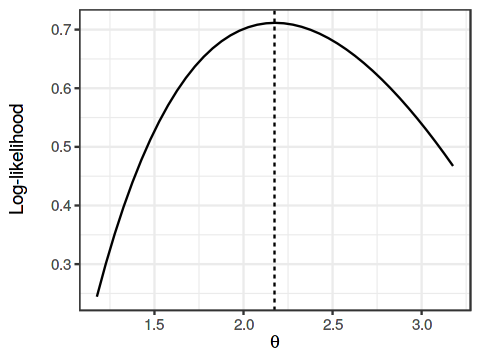

In [5]:
theta_hat <- -3/sum(log(X))
likelihood_df <- tibble( 
    theta = seq(theta_hat - 1, theta_hat + 1, 0.05) 
  ) %>% 
  mutate(l = loglikelihood(theta, X))
ggplot(likelihood_df, aes(x = theta, y = l)) +
  geom_line() +
  geom_vline(xintercept = theta_hat, linetype = "dashed") +
  scale_x_continuous(expression(theta)) +
  scale_y_continuous("Log-likelihood\n")

![top-cat](img/made-it.png)

## Footnotes

1. While it’s quite difficult to come up with real-life examples that fall exactly into some theoretical distribution, in practice, models based on such simplified assumptions provide surprisingly useful results.

1. Note that in this case, we only have one unknown, $\theta$, so solving one equation is sufficient; hence we only need to look at the first moment. In cases where there are more than one unknown parameter, we would have to compare the theoretical and estimated values of higher moments as well. More specifically, if we wanted to know both the lower and upper bounds of the Uniform distribution (instead of just assuming the lower bound to be 0), we would need at least the first and second moments of $X_i$.

1. In our example, if $\theta$ were actually smaller than the largest time we actually waited, this would imply that we had an unlucky day during which the bus was more delayed than usual. However, in theory (and under the assumptions of our model), we assume this doesn’t happen.

1. A proper implementation of the (log-)likelihood (as far as the math is concerned) would actually be a [closure](https://en.wikipedia.org/wiki/Closure_(computer_programming)) that takes the data ($X$) and returns the log-likelihood as a function of the parameter ($\theta$); but to keep things simple here we’re just going to create a function of both the parameter and data, and trust the user (us!) to be smart enough to keep the data constant.

1. This is a bit sloppy. In reality, we would also have to check the second derivative of $\ell(\theta)$ to make sure that the $\hat{\theta}$  we find is indeed a maximum.